In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [8]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [11]:
print(X.shape)

(70000, 784)


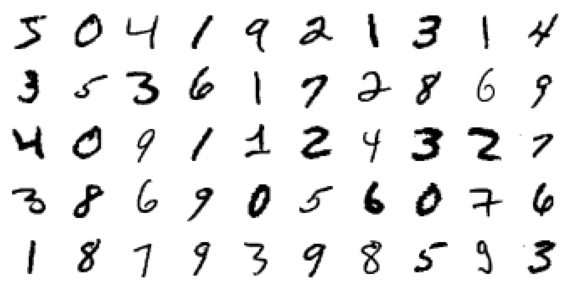

In [20]:
fig, axes = plt.subplots(5, 10, figsize=(10, 5))
i = 0
for ax in axes.flat:
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.axis('off')    
    i += 1
plt.savefig('figures/digits.pdf')

In [25]:
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [26]:
X = X / 255

In [27]:
train_size = 60000
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(300,), early_stopping=True, 
                    verbose=True)

In [29]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.35415292
Validation score: 0.950167
Iteration 2, loss = 0.15504686
Validation score: 0.964833
Iteration 3, loss = 0.10840875
Validation score: 0.969833
Iteration 4, loss = 0.08041958
Validation score: 0.972333
Iteration 5, loss = 0.06253450
Validation score: 0.973167
Iteration 6, loss = 0.05026046
Validation score: 0.975167
Iteration 7, loss = 0.04043972
Validation score: 0.975667
Iteration 8, loss = 0.03338001
Validation score: 0.973667
Iteration 9, loss = 0.02844816
Validation score: 0.976667
Iteration 10, loss = 0.02252325
Validation score: 0.977333
Iteration 11, loss = 0.01802472
Validation score: 0.978167
Iteration 12, loss = 0.01425377
Validation score: 0.979333
Iteration 13, loss = 0.01248984
Validation score: 0.978333
Iteration 14, loss = 0.00997251
Validation score: 0.979000
Iteration 15, loss = 0.00808456
Validation score: 0.978833
Iteration 16, loss = 0.00656912
Validation score: 0.977500
Iteration 17, loss = 0.00519168
Validation score: 0.978500
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(300,), verbose=True)

In [30]:
print('Accuracy on training set:', mlp.score(X_train, y_train))
print('Accuracy on test set:', mlp.score(X_test, y_test))

Accuracy on training set: 0.998
Accuracy on test set: 0.9795


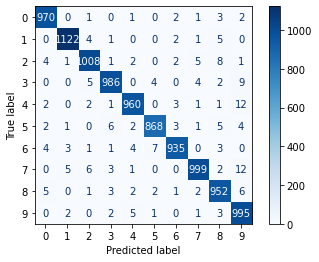

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap='Blues')

plt.savefig('figures/confusion_matrix.pdf')

Visualization of the weights

In [58]:
print(mlp.coefs_[0].shape)

(784, 300)


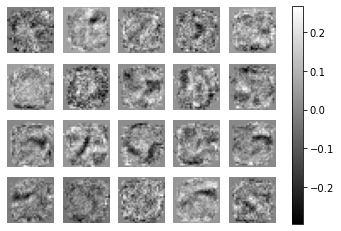

In [67]:
fig, axes = plt.subplots(4, 5)

for coef, ax in zip(mlp.coefs_[0].T, axes.flat):
    im = ax.imshow(coef.reshape(28, 28), cmap='gray')
    ax.axis('off')
    
fig.colorbar(im, ax=axes.flat)
plt.savefig('figures/mlp_weights.pdf')